1. For each dataset, and create a binary classification problem as follows. Assign to the positive class the class with the greatest number of examples, and assign to the netative class the rest of all the examples. 

In [51]:
import pandas as pd

## 1st dataset: yXT_car
data_car=pd.read_csv("yXT_car.csv", header=None)
data_car[0].value_counts()
def transform(x):
    return 1 if x==1 else -1
data_car[0]=data_car[0].apply(transform)

## 2nd dataset: yXT_seeds
data_seeds=pd.read_csv("yXT_seeds.csv", header=None)
data_seeds[0].value_counts()
def transform(x):
    return 1 if x==1 else -1
data_seeds[0]=data_seeds[0].apply(transform)

## 3rd dataset: yXT_wine
data_wine=pd.read_csv("yXT_wine.csv", header=None)
data_wine[0].value_counts()
def transform(x):
    return 1 if x==2 else -1
data_wine[0]=data_wine[0].apply(transform)

## 4th dataset: yXT_winequality
data_winequality=pd.read_csv("yXT_winequality-white.csv", header=None)
data_winequality[0].value_counts()
def transform(x):
    return 1 if x==6 else -1
data_winequality[0]=data_winequality[0].apply(transform)

## 5th dataset: yXT_yeast   
data_yeast=pd.read_csv("yXT_yeast.csv", header=None)
data_yeast[0].value_counts()
def transform(x):
    return 1 if x==3 else -1
data_yeast[0]=data_yeast[0].apply(transform)


2. For each of five datasets, divide examples in each class to two groups with ratio 70%:30%. Importantly, for each class, the one group has 70% of examples and the other group has the rest of examples.

In [96]:
from sklearn.model_selection import train_test_split

## 1st dataset: yXT_car
X_car_train, X_car_test, y_car_train, y_car_test=train_test_split(data_car.iloc[:,1::], data_car[0], \
                                                                  test_size=0.3, random_state=11)

## 2nd dataset: yXT_seeds
X_seeds_train, X_seeds_test, y_seeds_train, y_seeds_test=train_test_split(data_seeds.iloc[:,1::], data_seeds[0], \
                                                                  test_size=0.3, random_state=12)

## 3rd dataset: yXT_wine
X_wine_train, X_wine_test, y_wine_train, y_wine_test=train_test_split(data_wine.iloc[:,1::], data_wine[0], \
                                                                  test_size=0.3, random_state=13)

## 4th dataset: yXT_winequality
X_winequality_train, X_winequality_test, y_winequality_train, y_winequality_test=train_test_split(data_winequality.iloc[:,1::],\
                                                                            data_winequality[0],test_size=0.3, random_state=14)

## 5th dataset: yXT_yeast   
X_yeast_train, X_yeast_test, y_yeast_train, y_yeast_test=train_test_split(data_yeast.iloc[:,1::], data_yeast[0], \
                                                                  test_size=0.3, random_state=15)

3. Benchmark the pattern recognition performance on the testing subset using the linear SVM trained with the training subset, for each dataset. The regularization parameter $\lambda$ is set to $1/n$ where $n$ is the number of training examples.

In [102]:
from sklearn.svm import LinearSVC

## 1st dataset: yXT_car
clf=LinearSVC(C=1/len(y_car_train))
clf.fit(X_car_train, y_car_train)
print(clf.score(X_car_test, y_car_test))

## 2nd dataset: yXT_seeds
clf=LinearSVC(C=1/len(y_seeds_train))
clf.fit(X_seeds_train, y_seeds_train)
print(clf.score(X_seeds_test, y_seeds_test))

## 3rd dataset: yXT_wine
clf=LinearSVC(C=1/len(y_wine_train))
clf.fit(X_wine_train, y_wine_train)
print(clf.score(X_wine_test, y_wine_test))

## 4th dataset: yXT_winequality
clf=LinearSVC(C=1/len(y_winequality_train))
clf.fit(X_winequality_train, y_winequality_train)
print(clf.score(X_winequality_test, y_winequality_test))

## 5th dataset: yXT_yeast   
clf=LinearSVC(C=1/len(y_yeast_train))
clf.fit(X_yeast_train, y_yeast_train)
print(clf.score(X_yeast_test, y_yeast_test))


0.8169556840077071
0.746031746031746
0.8888888888888888


C:\Users\zhaoyiming\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.5557823129251701
0.6995515695067265


C:\Users\zhaoyiming\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


4. Compare the above result with the dataset preprocessed by two types of normalization. 
  L1 normalization: L1-norm of each feature vector is one;
  L2 normalization: L2-norm of each feature vector is one.

In [125]:
## 1st dataset: yXT_car
for l in ['l1','l2']:
    # intantiate a normalization transfomer:
    transformer=Normalizer(norm=l).fit(data_car.iloc[:,1::]) 
    # tranform the data's features:
    X_data=transformer.transform(data_car.iloc[:,1::]) 
    #split dataset used to train and test classifier:
    X_car_train, X_car_test, y_car_train, y_car_test=train_test_split(X_data, data_car[0], \
                                                                  test_size=0.3)
    # intantiate a svc classifier:
    clf=LinearSVC(C=1/len(y_car_train))
    # fit data to model:
    clf.fit(X_car_train, y_car_train)
    # print accuracy
    print(clf_l1.score(X_car_test, y_car_test))

## 2nd dataset: yXT_seeds
for l in ['l1','l2']:
    transformer=Normalizer(norm=l).fit(data_seeds.iloc[:,1::])
    X_data=transformer.transform(data_seeds.iloc[:,1::])
    X_seeds_train, X_seeds_test, y_seeds_train, y_seeds_test=train_test_split(X_data, data_seeds[0], \
                                                                  test_size=0.3)
    clf=LinearSVC(C=1/len(y_seeds_train))
    clf.fit(X_seeds_train, y_seeds_train)
    print(clf_l1.score(X_seeds_test, y_seeds_test))

## 3rd dataset: yXT_wine
for l in ['l1','l2']:
    transformer=Normalizer(norm=l).fit(data_wine.iloc[:,1::])
    X_data=transformer.transform(data_wine.iloc[:,1::])
    X_wine_train, X_wine_test, y_wine_train, y_wine_test=train_test_split(X_data, data_wine[0], \
                                                                  test_size=0.3)
    clf=LinearSVC(C=1/len(y_wine_train))
    clf.fit(X_wine_train, y_wine_train)
    print(clf.score(X_wine_test, y_wine_test))
    
## 4th dataset: yXT_winequality
for l in ['l1','l2']:
    transformer=Normalizer(norm=l).fit(data_winequality.iloc[:,1::])
    X_data=transformer.transform(data_winequality.iloc[:,1::])
    X_winequality_train, X_winequality_test, y_winequality_train, y_winequality_test=train_test_split(X_data,\
                                                                            data_winequality[0],test_size=0.3)
    clf=LinearSVC(C=1/len(y_winequality_train))
    clf.fit(X_winequality_train, y_winequality_train)
    print(clf.score(X_winequality_test, y_winequality_test))

## 5th dataset: yXT_yeast   
for l in ['l1','l2']:
    transformer=Normalizer(norm=l).fit(data_yeast.iloc[:,1::])
    X_data=transformer.transform(data_yeast.iloc[:,1::])
    X_yeast_train, X_yeast_test, y_yeast_train, y_yeast_test=train_test_split(X_data, data_yeast[0], \
                                                                  test_size=0.3)
    clf=LinearSVC(C=1/len(y_yeast_train))
    clf.fit(X_yeast_train, y_yeast_train)
    print(clf.score(X_yeast_test, y_yeast_test))
    print(X_data)


car_data_l1: 0.6994219653179191
car_data_l2: 0.8169556840077071
seeds_data_l1: 0.6507936507936508
seeds_data_l2: 0.746031746031746
wine_data_l1: 0.8518518518518519
wine_data_l2: 0.5925925925925926


C:\Users\zhaoyiming\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


winequality_data_l1: 0.5510204081632653
winequality_data_l2: 0.5591836734693878
yeast_data_l1: 0.6995515695067265
yeast_data_l2: 0.6995515695067265


C:\Users\zhaoyiming\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


5. Put each of five datasets back to multi-category classification problem. Train linear SVMs in the one-vs-rest manner with $\lambda=1/n$. Benchmark the accuracies of three normalization methods: no normalization, L1 normalization, and L2 normalization.

In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import Normalizer

## 1st dataset: yXT_car
# benchmark the accuracies of data without normalizaiton
data_car=pd.read_csv("yXT_car.csv", header=None)
X_car_train, X_car_test, y_car_train, y_car_test=train_test_split(data_car.iloc[:,1::], data_car[0], \
                                                                  test_size=0.3)
clf=OneVsRestClassifier(LinearSVC(C=1/len(y_car_train))).fit(X_car_train,y_car_train)
print(clf.score(X_car_test, y_car_test))
# benchmarck the accuracies of data with the normaliztion respectively:L1 and L2.
for l in ['l1','l2']:
    transformer=Normalizer(norm=l).fit(data_car.iloc[:,1::])
    X_data=transformer.transform(data_car.iloc[:,1::])
    X_car_train, X_car_test, y_car_train, y_car_test=train_test_split(X_data, data_car[0], \
                                                                  test_size=0.3, random_state=11)
    clf=OneVsRestClassifier(LinearSVC(C=1/len(y_car_train))).fit(X_car_train, y_car_train)
    print(clf.score(X_car_test, y_car_test))
    print(transformer)

    
## 2nd dataset: yXT_seeds
# benchmark the accuracies of data without normalizaiton   
data_seeds=pd.read_csv("yXT_seeds.csv", header=None)
X_seeds_train, X_seeds_test, y_seeds_train, y_seeds_test=train_test_split(data_seeds.iloc[:,1::], data_seeds[0], \
                                                                  test_size=0.3)
clf=OneVsRestClassifier(LinearSVC(C=1/len(y_seeds_train))).fit(X_seeds_train, y_seeds_train)
print(clf.score(X_seeds_test, y_seeds_test))
# benchmarck the accuracies of data with the normaliztion respectively:L1 and L2.
for l in ['l1','l2']:
    transformer=Normalizer(norm=l).fit(data_seeds.iloc[:,1::])
    X_data=transformer.transform(data_seeds.iloc[:,1::])
    X_seeds_train, X_seeds_test, y_seeds_train, y_seeds_test=train_test_split(X_data, data_seeds[0], \
                                                                  test_size=0.3, random_state=12)
    clf=OneVsRestClassifier(LinearSVC(C=1/len(y_seeds_train))).fit(X_seeds_train, y_seeds_train)
    print(clf.score(X_seeds_test, y_seeds_test))
    print(transformer)

    
## 3rd dataset: yXT_wine
# benchmark the accuracies of data without normalizaiton    
data_wine=pd.read_csv("yXT_wine.csv", header=None)
X_wine_train, X_wine_test, y_wine_train, y_wine_test=train_test_split(data_wine.iloc[:,1::], data_wine[0], \
                                                                  test_size=0.3)
clf=OneVsRestClassifier(LinearSVC(C=1/len(y_wine_train))).fit(X_wine_train, y_wine_train)
print(clf.score(X_wine_test, y_wine_test))
# benchmarck the accuracies of data with the normaliztion respectively:L1 and L2.
for l in ['l1','l2']:
    transformer=Normalizer(norm=l).fit(data_wine.iloc[:,1::])
    X_data=transformer.transform(data_wine.iloc[:,1::])
    X_wine_train, X_wine_test, y_wine_train, y_wine_test=train_test_split(X_data, data_wine[0], \
                                                                  test_size=0.3)
    clf=OneVsRestClassifier(LinearSVC(C=1/len(y_wine_train))).fit(X_wine_train, y_wine_train)
    print(clf.score(X_wine_test, y_wine_test))
    print(transformer)

    
## 4th dataset: yXT_winequality-white
# benchmark the accuracies of data without normalizaiton     
data_winequality=pd.read_csv("yXT_winequality-white.csv", header=None)
X_winequality_train, X_winequality_test, y_winequality_train, y_winequality_test=train_test_split(data_winequality.iloc[:,1::],\
                                                                            data_winequality[0],test_size=0.3)
clf=OneVsRestClassifier(LinearSVC(C=1/len(y_winequality_train))).fit(X_winequality_train, y_winequality_train)
print(clf.score(X_winequality_test, y_winequality_test))
# benchmarck the accuracies of data with the normaliztion respectively:L1 and L2.
for l in ['l1','l2']:
    transformer=Normalizer(norm=l).fit(data_winequality.iloc[:,1::])
    X_data=transformer.transform(data_winequality.iloc[:,1::])
    X_winequality_train, X_winequality_test, y_winequality_train, y_winequality_test=train_test_split(X_data,\
                                                                            data_winequality[0],test_size=0.3)
    clf=OneVsRestClassifier(LinearSVC(C=1/len(y_winequality_train))).fit(X_winequality_train, y_winequality_train)
    print(clf.score(X_winequality_test, y_winequality_test))
    print(transformer)
   

## 5th dataset: yXT_yeast
# benchmark the accuracies of data without normalizaiton     
data_yeast=pd.read_csv("yXT_yeast.csv", header=None)
X_yeast_train, X_yeast_test, y_yeast_train, y_yeast_test=train_test_split(data_yeast.iloc[:,1::], data_yeast[0], \
                                                                  test_size=0.3)
clf=OneVsRestClassifier(LinearSVC(C=1/len(y_yeast_train))).fit(X_yeast_train, y_yeast_train)
print(clf.score(X_yeast_test, y_yeast_test))
# benchmarck the accuracies of data with the normaliztion respectively:L1 and L2.
for l in ['l1','l2']:
    transformer=Normalizer(norm=l).fit(data_yeast.iloc[:,1::])
    X_data=transformer.transform(data_yeast.iloc[:,1::])
    X_yeast_train, X_yeast_test, y_yeast_train, y_yeast_test=train_test_split(X_data, data_yeast[0], \
                                                                  test_size=0.3)
    clf=OneVsRestClassifier(LinearSVC(C=1/len(y_yeast_train))).fit(X_yeast_train, y_yeast_train)
    print(clf.score(X_yeast_test, y_yeast_test))
    print(transformer)

0.7186897880539499
0.6994219653179191
Normalizer(copy=True, norm='l1')
0.6994219653179191
Normalizer(copy=True, norm='l2')
0.873015873015873
0.4126984126984127
Normalizer(copy=True, norm='l1')
0.5238095238095238
Normalizer(copy=True, norm='l2')
0.9259259259259259
0.3888888888888889
Normalizer(copy=True, norm='l1')
0.3888888888888889
Normalizer(copy=True, norm='l2')


C:\Users\zhaoyiming\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zhaoyiming\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zhaoyiming\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zhaoyiming\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zhaoyiming\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
 

0.46258503401360546
0.4421768707482993
Normalizer(copy=True, norm='l1')
0.45782312925170066
Normalizer(copy=True, norm='l2')
0.33856502242152464
0.32062780269058294
Normalizer(copy=True, norm='l1')
0.3183856502242152
Normalizer(copy=True, norm='l2')


5. Estimate the value of $\lambda$ by five-fold cross validation with candidate values $\lambda = 0.1/n, 1/n, 10/n$, and benchmark the accuracies of the three normalization methods.

In [110]:
from sklearn.model_selection import GridSearchCV, cross_val_score
import numpy as np
from sklearn.svm import LinearSVC

## 1st dataset' cross validation (yXT_car);
data_car=pd.read_csv("yXT_car.csv", header=None)
# benchmark the accuracies of non-normalization:
X_car_train, X_car_test, y_car_train, y_car_test=train_test_split(data_car.iloc[:,1::], data_car[0], \
                                                                  test_size=0.3)
C_s = [0.1/len(y_car_train), 1/len(y_car_train), 10/len(y_car_train)]
svm=LinearSVC()
scores_nonorm = list()
for C in C_s:
    svm.C = C
    this_scores = cross_val_score(svm, X_car_train, y_car_train, n_jobs=1)
    scores_nonorm.append(np.mean(this_scores))
print(scores_nonorm)    
#benchmark the accuracies of L1 and L2 normalization:
scores_norm = list()
for l in ['l1','l2']:
    transformer=Normalizer(norm=l).fit(data_car.iloc[:,1::])
    X_data=transformer.transform(data_car.iloc[:,1::])
    X_car_train, X_car_test, y_car_train, y_car_test=train_test_split(X_data, data_car[0], \
                                                                  test_size=0.3, random_state=11)
    C_s = [0.1/len(y_car_train), 1/len(y_car_train), 10/len(y_car_train)]
    scores=list()
    for C in C_s:
        svm.C = C
        this_scores = cross_val_score(svm, X_car_train, y_car_train, n_jobs=1)
        scores.append(np.mean(this_scores))
    scores_norm.append(scores) 
print(scores_norm)

[0.7005795411679984, 0.7038921847673263, 0.7559960220842907]
[[0.7005795411679984, 0.7005795411679984, 0.7005795411679984], [0.7005795411679984, 0.7005795411679984, 0.7005795411679984]]


In [111]:
## 2nd dataset' cross validation (yXT_seeds);
data_seeds=pd.read_csv("yXT_seeds.csv", header=None)
# benchmark the accuracies of non-normalization:
X_seeds_train, X_seeds_test, y_seeds_train, y_seeds_test=train_test_split(data_seeds.iloc[:,1::], data_seeds[0], \
                                                                  test_size=0.3)
C_s = [0.1/len(y_seeds_train), 1/len(y_seeds_train), 10/len(y_seeds_train)]
svm=LinearSVC()
scores_nonorm = list()
for C in C_s:
    svm.C = C
    this_scores = cross_val_score(svm, X_seeds_train, y_seeds_train, n_jobs=1)
    scores_nonorm.append(np.mean(this_scores))
print(scores_nonorm)    
#benchmark the accuracies of L1 and L2 normalization:
scores_norm = list()
for l in ['l1','l2']:
    transformer=Normalizer(norm=l).fit(data_seeds.iloc[:,1::])
    X_data=transformer.transform(data_seeds.iloc[:,1::])
    X_seeds_train, X_seeds_test, y_seeds_train, y_seeds_test=train_test_split(X_data, data_seeds[0], \
                                                                  test_size=0.3)
    C_s = [0.1/len(y_seeds_train), 1/len(y_seeds_train), 10/len(y_seeds_train)]
    scores=[]
    for C in C_s:
        svm.C = C
        this_scores = cross_val_score(svm, X_seeds_train, y_seeds_train, n_jobs=1)
        scores.append(np.mean(this_scores))
    scores_norm.append(scores) 
print(scores_norm)

[0.8710344827586207, 0.8981609195402299, 0.9319540229885058]
[[0.35356321839080457, 0.35356321839080457, 0.5022988505747127], [0.3673563218390804, 0.3673563218390804, 0.5990804597701149]]


C:\Users\zhaoyiming\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


6. Repeat Step 8 ten times to compute ten accuracies for each normalization method. Find the best method. Use the one sample t-test to examine the statistical significance of the difference in accuracy between the best methd and other methods.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import Normalizer


C:\Users\zhaoyiming\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zhaoyiming\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zhaoyiming\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zhaoyiming\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zhaoyiming\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
 

0.9523809523809523
0.9047619047619048


C:\Users\zhaoyiming\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zhaoyiming\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zhaoyiming\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zhaoyiming\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zhaoyiming\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
 

0.8888888888888888
0.9206349206349206


C:\Users\zhaoyiming\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


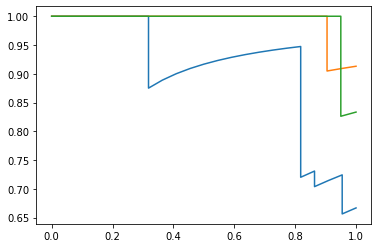

In [91]:

for i in range(4):
    ## Benchmark non-normalization's accuracies and find best parameter
    X_seeds_train, X_seeds_test, y_seeds_train, y_seeds_test=train_test_split(data_seeds.iloc[:,1::], data_seeds[0], \
                                                                  test_size=0.3)
    n=len(y_seeds_train)
    C_s = [0.1/n, 1/n, 10/n]
    svm=LinearSVC()
    scores_nonorm = list()
    for C in C_s:
        svm.C = C
        this_scores = cross_val_score(svm, X_seeds_train, y_seeds_train, n_jobs=1)
        scores_nonorm.append(np.mean(this_scores))   
    #print(scores_nonorm)
    # find the best para index from the scores list:
    best_para_index=np.argmax(scores_nonorm) 
    #print(best_para_index)
    # find the best para based on the best para index and add the corresponding value to best para list:
    best_para_nonorm.append(C_s[best_para_index]) 
    #print(C_s[best_para_index])
    svm.C = C_s[best_para_index]
    svm.fit(X_seeds_test,y_seeds_test)
    print(svm.score(X_seeds_test,y_seeds_test))

## plot precision-recall curve
precision = dict()
recall = dict()
average_precision = dict()
labels = []
Y = label_binarize(data_seeds[0], classes=[1, 2, 3])
X_seeds_train, X_seeds_test, y_seeds_train, y_seeds_test=train_test_split(data_seeds.iloc[:,1::], Y, \
                                                                          test_size=0.3)

classifier = OneVsRestClassifier(LinearSVC(C=C_s[best_para_index],random_state=random_state))
classifier.fit(X_seeds_test, y_seeds_test)
y_score = classifier.decision_function(X_seeds_test)    

for i in range(3):
    precision[i], recall[i], _ = precision_recall_curve(y_seeds_test[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(y_seeds_test[:, i], y_score[:, i])
    plt.plot(recall[i],precision[i])
#labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                     # ''.format(i+1, average_precision[i]))

#plt.legend(labels, loc=(0, -.38), prop=dict(size=14))


In [10]:


## non-normalization: 
data_seeds=pd.read_csv("yXT_seeds.csv", header=None)
best_para_nonorm=[]

## l1 normalization dataset:
transformer=Normalizer(norm='l1').fit(data_seeds.iloc[:,1::])
X_data_l1=transformer.transform(data_seeds.iloc[:,1::])
best_para_norm_l1=[]

## l2 normalization dataset:
transformer=Normalizer(norm='l2').fit(data_seeds.iloc[:,1::])
X_data_l2=transformer.transform(data_seeds.iloc[:,1::])
best_para_norm_l2=[]

scores_non=[]
scores_l1=[]
scores_l2=[]

for i in range(10):
    ## Benchmark non-normalization's accuracies and find best parameter
    X_seeds_train, X_seeds_test, y_seeds_train, y_seeds_test=train_test_split(data_seeds.iloc[:,1::], data_seeds[0], \
                                                                  test_size=0.3)
    n=len(y_seeds_train)
    C_s = [0.1/n, 1/n, 10/n]
    svm=LinearSVC()
    scores_nonorm = list()
    for C in C_s:
        svm.C = C
        this_scores = cross_val_score(svm, X_seeds_train, y_seeds_train, n_jobs=1)
        scores_nonorm.append(np.mean(this_scores))   
    #print(scores_nonorm)
    # find the best para index from the scores list:
    best_para_index=np.argmax(scores_nonorm) 
    #print(best_para_index)
    # find the best para based on the best para index and add the corresponding value to best para list:
    best_para_nonorm.append(C_s[best_para_index]) 
    #print(C_s[best_para_index])
    svm.C=C_s[best_para_index]
    svm.fit(X_seeds_test, y_seeds_test)
    scores_non.append(svm.score(X_seeds_test, y_seeds_test))
    
    ## Benchmark L1 normalization's accuracies and find best parameter
    scores_norm_l1 = list() 
    X_seeds_train, X_seeds_test, y_seeds_train, y_seeds_test=train_test_split(X_data_l1, data_seeds[0], \
                                                                  test_size=0.3)
    n=len(y_seeds_train)
    C_s = [0.1/n, 1/n, 10/n]
    for C in C_s:
        svm.C = C
        this_scores = cross_val_score(svm, X_seeds_train, y_seeds_train, n_jobs=1)
        scores_norm_l1.append(np.mean(this_scores))
    #print(scores_norm_l1)
    best_para_index=np.argmax(scores_norm_l1)
    best_para_norm_l1.append(C_s[best_para_index])
    
    svm.C=C_s[best_para_index]
    svm.fit(X_seeds_test, y_seeds_test)
    scores_l1.append(svm.score(X_seeds_test, y_seeds_test))
    ## Benchmark L2 normalization's accuracies and find best parameter
    scores_norm_l2 = list() 
    X_seeds_train, X_seeds_test, y_seeds_train, y_seeds_test=train_test_split(X_data_l2, data_seeds[0], \
                                                                  test_size=0.3)
    n=len(y_seeds_train)
    C_s = [0.1/n, 1/n, 10/n]
    for C in C_s:
        svm.C = C
        this_scores = cross_val_score(svm, X_seeds_train, y_seeds_train, n_jobs=1)
        scores_norm_l2.append(np.mean(this_scores))
    #print(scores_norm_l2)
    best_para_index=np.argmax(scores_norm_l2)
    best_para_norm_l2.append(C_s[best_para_index])
    svm.C=C_s[best_para_index]
    svm.fit(X_seeds_test, y_seeds_test)
    scores_l2.append(svm.score(X_seeds_test, y_seeds_test))
#print(best_para_nonorm[np.argmax(np.bincount(best_para_nonorm))])
#print(best_para_norm_l1[np.argmax(np.bincount(best_para_norm_l1))])
#print(best_para_norm_l2[np.argmax(np.bincount(best_para_norm_l2))])
print(scores_non)
print(scores_l1)
print(scores_l2)

C:\Users\zhaoyiming\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zhaoyiming\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zhaoyiming\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zhaoyiming\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zhaoyiming\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
 

[0.873015873015873, 0.8888888888888888, 0.8888888888888888, 0.873015873015873, 0.9523809523809523, 0.9365079365079365, 0.8571428571428571, 0.9523809523809523, 0.9682539682539683, 0.8571428571428571]
[0.36507936507936506, 0.4126984126984127, 0.38095238095238093, 0.38095238095238093, 0.38095238095238093, 0.5555555555555556, 0.6349206349206349, 0.42857142857142855, 0.3492063492063492, 0.38095238095238093]
[0.6825396825396826, 0.47619047619047616, 0.3968253968253968, 0.6666666666666666, 0.3968253968253968, 0.3968253968253968, 0.5396825396825397, 0.42857142857142855, 0.38095238095238093, 0.4126984126984127]


C:\Users\zhaoyiming\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zhaoyiming\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [21]:
$=0.905 $x$$^{(2)}$=0.427 $x$$^{(3)}$=0.478

0.47777777777777786

In [ ]:
$\overline{x}$$^{(1)}

In [25]:
from scipy import stats

scores_non=np.array(scores_non)
scores_l1=np.array(scores_l1)
scores_l2=np.array(scores_l2)

d_mean_non_l1=np.sum(scores_non-scores_l1)/10
d_mean_non_l2=np.sum(scores_non-scores_l2)/10
d_mean_l1_l2=np.sum(scores_l1-scores_l2)/10
s_non_l1=np.sqrt((np.square(scores_non-scores_l1).sum()-d_mean_non_l1**2/10)/9)
s_non_l2=np.sqrt((np.square(scores_non-scores_l2).sum()-d_mean_non_l2**2/10)/9)
s_l1_l2=np.sqrt((np.square(scores_l1-scores_l2).sum()-d_mean_l1_l2**2/10)/9)
t_non_l1=d_mean_non_l1/(s_non_l1/np.sqrt(10))
t_non_l2=d_mean_non_l2/(s_non_l2/np.sqrt(10))
t_l1_l2=d_mean_l1_l2/(s_l1_l2/np.sqrt(10))
p_value_non_l1=stats.t.sf(abs(t_non_l1),9)
p_value_non_l2=stats.t.sf(abs(t_non_l2),9)
p_value_l1_l2=stats.t.sf(abs(t_l1_l2),9)
d_mean_l1_l2

-0.050793650793650794